In [285]:
# Import numpy, pandas for data manipulation
import numpy as np
import pandas as pd
from collections import Counter
import time

# Import plotly, matplotlib and seaborn as visualization tools
import matplotlib.pyplot as plt
from plotly import tools
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode
import seaborn as sns

# Import for resampling the data
from imblearn.over_sampling import SMOTE

# Import for scaling the data
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder

# Import machine learning models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier

# Import model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Plot should appear inside the jupyter notebook
%matplotlib inline

init_notebook_mode(connected=True)

In [286]:
# Loading the dataset
df = pd.read_csv("dataset.csv")
df.head()


,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,TOTAL ELECTORS,TOTAL VOTING,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY
0,Andhra Pradesh,Araku,gumma thanuja rani,1,YSRCP,Ceiling fan,FEMALE,0.0,31.0,ST,Graduate Professional,"Rs 23,54,678~ 23 Lacs+",Rs 0~,471470,5535,477005,1557153,1113975,30.63,42.82
1,Andhra Pradesh,Araku,kothapalli geetha,0,BJP,Lotus,FEMALE,2.0,53.0,ST,Post Graduate,Unknown,Unknown,417113,9312,426425,1557153,1113975,27.38,38.28
2,Andhra Pradesh,Araku,appalanarasa pachipenta,0,CPI(M),"Hammer, Sickle and Star",MALE,4.0,41.0,ST,Post Graduate,"Rs 29,25,792~ 29 Lacs+","Rs 2,43,125~ 2 Lacs+",119016,4113,123129,1557153,1113975,7.91,11.05
3,Andhra Pradesh,Araku,avashya lahari . varam,0,BSP,Elephant,FEMALE,0.0,30.0,ST,Graduate Professional,"Rs 53,90,634~ 53 Lacs+","Rs 16,27,956~ 16 Lacs+",24858,892,25750,1557153,1113975,1.65,2.31
4,Andhra Pradesh,Araku,samareddy balakrishna,0,IND,Gas cylinder,MALE,0.0,48.0,ST,Post Graduate,Unknown,Unknown,9493,42,9535,1557153,1113975,0.61,0.86


In [287]:
df.replace({'Not Available': np.nan}, inplace=True)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8359 entries, 0 to 8358
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   STATE                                    8359 non-null   object 
 1   CONSTITUENCY                             8359 non-null   object 
 2   NAME                                     8359 non-null   object 
 3   WINNER                                   8359 non-null   int64  
 4   PARTY                                    8359 non-null   object 
 5   SYMBOL                                   8359 non-null   object 
 6   GENDER                                   8359 non-null   object 
 7   CRIMINAL CASES                           8359 non-null   float64
 8   AGE                                      8359 non-null   float64
 9   CATEGORY                                 8359 non-null   object 
 10  EDUCATION                                8359 no

In [289]:
df.columns = df.columns.str.replace('\r','')
df.columns = df.columns.str.replace('\n','')

In [290]:
df.describe()

,WINNER,CRIMINAL CASES,AGE,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,TOTAL ELECTORS,TOTAL VOTING,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY
count,8359.000000,8359.000000,8359.000000,8.359000e+03,8359.00000,8.359000e+03,8.359000e+03,8.359000e+03,8359.000000,8359.000000
mean,0.068549,0.632133,47.765163,7.600097e+04,442.46764,7.644344e+04,1.841400e+06,1.201633e+06,4.285400,6.484028
std,0.252701,4.323564,11.971231,1.838803e+05,1379.91211,1.849374e+05,3.458819e+05,2.203456e+05,10.158091,15.193354
min,0.000000,0.000000,25.000000,5.800000e+01,0.00000,6.100000e+01,5.795300e+04,4.906700e+04,0.000000,0.010000
25%,0.000000,0.000000,38.000000,1.034500e+03,3.00000,1.043000e+03,1.641887e+06,1.073913e+06,0.060000,0.090000
50%,0.000000,0.000000,47.000000,2.459000e+03,8.00000,2.468000e+03,1.823717e+06,1.200032e+06,0.140000,0.210000
75%,0.000000,0.000000,56.000000,8.541500e+03,41.00000,8.586000e+03,2.015928e+06,1.353736e+06,0.480000,0.720000
max,1.000000,243.000000,88.000000,1.468549e+06,19827.00000,1.471885e+06,3.780453e+06,2.438593e+06,59.980000,91.320000


In [291]:
# Checking to see if the dataset contains any null values. We need to exclude NOTA votes while checking it.
df = df[df['PARTY']!= 'NOTA']
df = df.dropna()
df.isna().sum()

STATE                                      0
CONSTITUENCY                               0
NAME                                       0
WINNER                                     0
PARTY                                      0
SYMBOL                                     0
GENDER                                     0
CRIMINAL CASES                             0
AGE                                        0
CATEGORY                                   0
EDUCATION                                  0
ASSETS                                     0
LIABILITIES                                0
GENERAL VOTES                              0
POSTAL VOTES                               0
TOTAL VOTES                                0
TOTAL ELECTORS                             0
TOTAL VOTING                               0
OVER TOTAL ELECTORS IN CONSTITUENCY        0
OVER TOTAL VOTES POLLED IN CONSTITUENCY    0
dtype: int64

In [292]:
df.head(10)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,TOTAL ELECTORS,TOTAL VOTING,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY
0,Andhra Pradesh,Araku,gumma thanuja rani,1,YSRCP,Ceiling fan,FEMALE,0.0,31.0,ST,Graduate Professional,"Rs 23,54,678~ 23 Lacs+",Rs 0~,471470,5535,477005,1557153,1113975,30.63,42.82
1,Andhra Pradesh,Araku,kothapalli geetha,0,BJP,Lotus,FEMALE,2.0,53.0,ST,Post Graduate,Unknown,Unknown,417113,9312,426425,1557153,1113975,27.38,38.28
2,Andhra Pradesh,Araku,appalanarasa pachipenta,0,CPI(M),"Hammer, Sickle and Star",MALE,4.0,41.0,ST,Post Graduate,"Rs 29,25,792~ 29 Lacs+","Rs 2,43,125~ 2 Lacs+",119016,4113,123129,1557153,1113975,7.91,11.05
3,Andhra Pradesh,Araku,avashya lahari . varam,0,BSP,Elephant,FEMALE,0.0,30.0,ST,Graduate Professional,"Rs 53,90,634~ 53 Lacs+","Rs 16,27,956~ 16 Lacs+",24858,892,25750,1557153,1113975,1.65,2.31
4,Andhra Pradesh,Araku,samareddy balakrishna,0,IND,Gas cylinder,MALE,0.0,48.0,ST,Post Graduate,Unknown,Unknown,9493,42,9535,1557153,1113975,0.61,0.86
5,Andhra Pradesh,Araku,nimmaka jayaraju,0,IND,Bat,MALE,0.0,64.0,ST,12th Pass,"Rs 1,26,17,000~ 1 Crore+","Rs 32,28,000~ 32 Lacs+",8798,664,9462,1557153,1113975,0.61,0.85
6,Andhra Pradesh,Araku,athidhi,0,IND,Plate containing food,FEMALE,0.0,32.0,ST,Graduate,"Rs 20,43,321~ 20 Lacs+","Rs 17,93,245~ 17 Lacs+",8121,15,8136,1557153,1113975,0.52,0.73
7,Andhra Pradesh,Araku,chanti badnaina,0,JBNP,Battery Torch,MALE,0.0,28.0,ST,12th Pass,"Rs 1,80,000~ 1 Lacs+",Rs 0~,7205,47,7252,1557153,1113975,0.47,0.65
8,Andhra Pradesh,Araku,mottadam . rajababu,0,BHRTADVSIP,Hockey and ball,MALE,0.0,47.0,ST,Graduate Professional,Nil,Rs 0~,6370,396,6766,1557153,1113975,0.43,0.61
9,Andhra Pradesh,Araku,ranjith kumar palaka,0,IND,Biscuit,MALE,0.0,42.0,ST,Graduate,"Rs 35,000~ 35 Thou+",Rs 0~,6000,47,6047,1557153,1113975,0.39,0.54


In [293]:
df.dtypes

STATE                                       object
CONSTITUENCY                                object
NAME                                        object
WINNER                                       int64
PARTY                                       object
SYMBOL                                      object
GENDER                                      object
CRIMINAL CASES                             float64
AGE                                        float64
CATEGORY                                    object
EDUCATION                                   object
ASSETS                                      object
LIABILITIES                                 object
GENERAL VOTES                                int64
POSTAL VOTES                                 int64
TOTAL VOTES                                  int64
TOTAL ELECTORS                               int64
TOTAL VOTING                                 int64
OVER TOTAL ELECTORS IN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED IN CONS

In [294]:
def clean_numeric(value):
    if isinstance(value, str):  
        # Remove unwanted characters (~, +, Rs, etc.)
        value = value.replace(",", "").replace("~", "").replace("+", "").replace("Rs", "").strip()
        
        # If there are multiple numbers (e.g., "2354678 23 Lacs"), take the first numeric part
        value = value.split()[0] 
        
    try:
        return float(value)
    except ValueError:
        return 0  # If conversion fails, return 0

# Apply the cleaning function to financial columns
df["ASSETS"] = df["ASSETS"].apply(clean_numeric)
df["LIABILITIES"] = df["LIABILITIES"].apply(clean_numeric)

In [295]:
df['EDUCATION'].value_counts()

EDUCATION
Post Graduate            1445
Graduate                 1405
12th Pass                1242
10th Pass                1087
Graduate Professional     891
8th Pass                  615
Unknown                   601
5th Pass                  318
Others                    262
Literate                  201
Doctorate                 176
Illiterate                104
Not Given                  12
Name: count, dtype: int64

In [296]:
df['EDUCATION'] = df['EDUCATION'].str.strip()
df['EDUCATION'] = df['EDUCATION'].replace(r'\s+', ' ', regex=True)  # Removes extra spaces/newlines

df['EDUCATION'] = df['EDUCATION'].replace({
    'Post Graduate': 'Post Graduate',
    'Graduate Professional': 'Graduate',
    'Literate': '8th Pass',
    '5th Pass': 'Illiterate'
})


In [297]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,TOTAL ELECTORS,TOTAL VOTING,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY
0,Andhra Pradesh,Araku,gumma thanuja rani,1,YSRCP,Ceiling fan,FEMALE,0.0,31.0,ST,Graduate,2354678.0,0.0,471470,5535,477005,1557153,1113975,30.63,42.82
1,Andhra Pradesh,Araku,kothapalli geetha,0,BJP,Lotus,FEMALE,2.0,53.0,ST,Post Graduate,0.0,0.0,417113,9312,426425,1557153,1113975,27.38,38.28
2,Andhra Pradesh,Araku,appalanarasa pachipenta,0,CPI(M),"Hammer, Sickle and Star",MALE,4.0,41.0,ST,Post Graduate,2925792.0,243125.0,119016,4113,123129,1557153,1113975,7.91,11.05
3,Andhra Pradesh,Araku,avashya lahari . varam,0,BSP,Elephant,FEMALE,0.0,30.0,ST,Graduate,5390634.0,1627956.0,24858,892,25750,1557153,1113975,1.65,2.31
4,Andhra Pradesh,Araku,samareddy balakrishna,0,IND,Gas cylinder,MALE,0.0,48.0,ST,Post Graduate,0.0,0.0,9493,42,9535,1557153,1113975,0.61,0.86


In [298]:
df.dtypes

STATE                                       object
CONSTITUENCY                                object
NAME                                        object
WINNER                                       int64
PARTY                                       object
SYMBOL                                      object
GENDER                                      object
CRIMINAL CASES                             float64
AGE                                        float64
CATEGORY                                    object
EDUCATION                                   object
ASSETS                                     float64
LIABILITIES                                float64
GENERAL VOTES                                int64
POSTAL VOTES                                 int64
TOTAL VOTES                                  int64
TOTAL ELECTORS                               int64
TOTAL VOTING                                 int64
OVER TOTAL ELECTORS IN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED IN CONS

In [299]:
df['CRIMINAL CASES'] = df['CRIMINAL CASES'].astype(int, errors='raise')
df['ASSETS'] = df['ASSETS'].astype(float, errors='raise')
df['LIABILITIES'] = df['LIABILITIES'].astype(float, errors='raise')

In [300]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,TOTAL ELECTORS,TOTAL VOTING,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY
0,Andhra Pradesh,Araku,gumma thanuja rani,1,YSRCP,Ceiling fan,FEMALE,0,31.0,ST,Graduate,2354678.0,0.0,471470,5535,477005,1557153,1113975,30.63,42.82
1,Andhra Pradesh,Araku,kothapalli geetha,0,BJP,Lotus,FEMALE,2,53.0,ST,Post Graduate,0.0,0.0,417113,9312,426425,1557153,1113975,27.38,38.28
2,Andhra Pradesh,Araku,appalanarasa pachipenta,0,CPI(M),"Hammer, Sickle and Star",MALE,4,41.0,ST,Post Graduate,2925792.0,243125.0,119016,4113,123129,1557153,1113975,7.91,11.05
3,Andhra Pradesh,Araku,avashya lahari . varam,0,BSP,Elephant,FEMALE,0,30.0,ST,Graduate,5390634.0,1627956.0,24858,892,25750,1557153,1113975,1.65,2.31
4,Andhra Pradesh,Araku,samareddy balakrishna,0,IND,Gas cylinder,MALE,0,48.0,ST,Post Graduate,0.0,0.0,9493,42,9535,1557153,1113975,0.61,0.86


In [301]:
state_df = df[['STATE','CONSTITUENCY','TOTAL ELECTORS']]
state_fig = px.sunburst(state_df, 
                        path=['STATE','CONSTITUENCY'], 
                        values='TOTAL ELECTORS',
                        color='TOTAL ELECTORS',
                        color_continuous_scale='Oryel')
state_fig.update_layout(title_text='State and Constituency by total electors',
                       font_family="Courier New",
                         font_color="#351f39",
                         title_font_family="Courier New",
                         title_font_color="#351f39",
                         xaxis_title="Party",
                         yaxis_title="Seats")
state_fig.show()

In [302]:
# Number of seats won by each party
result = df[df['WINNER'] == 1].groupby('PARTY')['WINNER'].size()
result_df = pd.DataFrame(data=result).sort_values(by="WINNER", ascending=False)
result_df.reset_index(level=0, inplace=True)

# Visualize the party-wise election results
result_fig = px.bar(result_df, 
                    x=result_df['PARTY'][:20], 
                    y=result_df["WINNER"][:20], 
                    color=result_df['WINNER'][:20], 
                    height=500,
                    color_continuous_scale='Oryel')
result_fig.update_layout(title_text='Top 20 Party-wise election results',
                         font_family="Courier New",
                         font_color="#351f39",
                         title_font_family="Courier New",
                         title_font_color="#351f39",
                         xaxis_title="Party",
                         yaxis_title="Seats")
result_fig.show()

In [303]:
# Create a dataframe with total number of votes won by each party
result = df[df['WINNER'] == 1].groupby('PARTY')['WINNER'].size()
vote_Share = df.groupby('PARTY')['TOTAL VOTES'].sum()
vote_Share_df = pd.DataFrame(data=vote_Share, index=vote_Share.index).sort_values(by="TOTAL VOTES", ascending=False)
vote_Share_df.reset_index(level=0, inplace=True)

# Sort out the top five parties according to the total number of votes
vote_share_top5 = df.groupby('PARTY')['TOTAL VOTES'].sum().nlargest(5).index.tolist()

# Create a method to label parties as 'Other' if they are not top five in total number of votes.
def sort_party(data):
    '''
    Method to label parties as 'Other' if they are not top five in total number of votes.
    data: input rows
    '''
    if data['PARTY'] not in vote_share_top5:
        return 'Other'
    else:
        return data['PARTY']

# Calling the method
df['Party New'] = df.apply(sort_party, axis=1)

# Visualize Party-wise vote share
vote_count = df.groupby('Party New')['TOTAL VOTES'].sum()
vote_count_fig = go.Figure(go.Pie(labels=vote_count.index, 
                                  values=vote_count.values,
                                  pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                                  marker=dict(line=dict(color="#000000", 
                                                        width=2))))
vote_count_fig.update_layout(title_text='Party-wise Vote Share',
                             font_family="Courier New",
                             font_color="#351f39",
                             title_font_family="Courier New",
                             title_font_color="#351f39")
vote_count_fig.show()

In [304]:
df['Party New'].value_counts()

Party New
IND      3921
Other    3551
BJP       440
INC       328
SP         71
AITC       48
Name: count, dtype: int64

In [305]:
# Visualize the age distribution of candidates
age_distribution_fig = px.histogram(df, 
                                    x="AGE",
                                    color_discrete_sequence=['indianred'])
age_distribution_fig.update_layout(title_text='Age Distribution of Candidates',
                                   xaxis_title="Distribution",
                                   yaxis_title="Age")
age_distribution_fig.update_layout(font_family="Courier New",
                                   font_color="#351f39",
                                   title_font_family="Courier New",
                                   title_font_color="#351f39")
age_distribution_fig.show()

In [306]:
# Create a dataframe containing the caste distribution of winners
winner_caste = df[df['WINNER'] == 1].groupby('CATEGORY')['WINNER'].size()
winner_caste_df = pd.DataFrame(data=winner_caste)
winner_caste_df.reset_index(level=0, inplace=True)
winner_caste_df['Category'] = 'Winner'

# Create a dataframe containing the caste distribution of total number of candidates
total_caste = df.groupby('CATEGORY').size()
total_caste_df = pd.DataFrame(data=total_caste)
total_caste_df.reset_index(level=0, inplace=True)
total_caste_df['Category'] = 'Total'
total_caste_df.rename(columns={0: "WINNER"}, inplace=True)

# Concatenate the two dataframes
winner_caste_df = pd.concat((winner_caste_df, total_caste_df))

# Visualize the results
caste_fig = px.bar(winner_caste_df, 
                   x='CATEGORY', 
                   y='WINNER',
                   color='Category', 
                   barmode='group')
caste_fig.update_layout(font_family="Courier New",
                        font_color="#351f39",
                        title_text='Caste distribution of candidates',
                        title_font_family="Courier New",
                        title_font_color="#351f39",
                        xaxis_title='Caste',
                        yaxis_title='Count')
caste_fig.show()

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [307]:
# Create a dataframe of criminal records
criminal_df = pd.DataFrame(data=df[df['WINNER'] == 1].groupby('PARTY')['CRIMINAL CASES'].sum())
criminal_df.sort_values(by='CRIMINAL CASES', ascending=False, inplace=True)
criminal_df.reset_index(level=0, inplace=True)
criminal_df

# Visualize the criminal records
criminal_fig = px.scatter(criminal_df[:10], 
                 x='PARTY', 
                 y='CRIMINAL CASES', 
                 size='CRIMINAL CASES',
                 color='PARTY',
                 hover_data=['CRIMINAL CASES'])

criminal_fig.update_layout(title_text='Top 10 Party-wise criminal records',
                         font_family="Courier New",
                         font_color="#351f39",
                         title_font_family="Courier New",
                         title_font_color="#351f39",
                         xaxis_title="Party",
                         yaxis_title="Criminal Records")

criminal_fig.show()

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [308]:
# This is the dataset which will be used for fitting Machine Learning models
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,...,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,TOTAL ELECTORS,TOTAL VOTING,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,Party New
0,Andhra Pradesh,Araku,gumma thanuja rani,1,YSRCP,Ceiling fan,FEMALE,0,31.0,ST,...,2354678.0,0.0,471470,5535,477005,1557153,1113975,30.63,42.82,Other
1,Andhra Pradesh,Araku,kothapalli geetha,0,BJP,Lotus,FEMALE,2,53.0,ST,...,0.0,0.0,417113,9312,426425,1557153,1113975,27.38,38.28,BJP
2,Andhra Pradesh,Araku,appalanarasa pachipenta,0,CPI(M),"Hammer, Sickle and Star",MALE,4,41.0,ST,...,2925792.0,243125.0,119016,4113,123129,1557153,1113975,7.91,11.05,Other
3,Andhra Pradesh,Araku,avashya lahari . varam,0,BSP,Elephant,FEMALE,0,30.0,ST,...,5390634.0,1627956.0,24858,892,25750,1557153,1113975,1.65,2.31,Other
4,Andhra Pradesh,Araku,samareddy balakrishna,0,IND,Gas cylinder,MALE,0,48.0,ST,...,0.0,0.0,9493,42,9535,1557153,1113975,0.61,0.86,IND


In [309]:
# Labeling parties with less than 10 candidates as others
less_candidates = []
for i, j in df['PARTY'].value_counts().items():
    if j <= 10:
        less_candidates.append(i)
len(less_candidates)

def small_party(data):
    if data in less_candidates:
        return 'Other'
    return data
df['PARTY'] = df['PARTY'].apply(small_party)
df['PARTY'].value_counts()

df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,...,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,TOTAL ELECTORS,TOTAL VOTING,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,Party New
0,Andhra Pradesh,Araku,gumma thanuja rani,1,YSRCP,Ceiling fan,FEMALE,0,31.0,ST,...,2354678.0,0.0,471470,5535,477005,1557153,1113975,30.63,42.82,Other
1,Andhra Pradesh,Araku,kothapalli geetha,0,BJP,Lotus,FEMALE,2,53.0,ST,...,0.0,0.0,417113,9312,426425,1557153,1113975,27.38,38.28,BJP
2,Andhra Pradesh,Araku,appalanarasa pachipenta,0,CPI(M),"Hammer, Sickle and Star",MALE,4,41.0,ST,...,2925792.0,243125.0,119016,4113,123129,1557153,1113975,7.91,11.05,Other
3,Andhra Pradesh,Araku,avashya lahari . varam,0,BSP,Elephant,FEMALE,0,30.0,ST,...,5390634.0,1627956.0,24858,892,25750,1557153,1113975,1.65,2.31,Other
4,Andhra Pradesh,Araku,samareddy balakrishna,0,IND,Gas cylinder,MALE,0,48.0,ST,...,0.0,0.0,9493,42,9535,1557153,1113975,0.61,0.86,IND


In [310]:
X = df.drop(['NAME', 'SYMBOL', 'WINNER', 'GENERAL VOTES', 'POSTAL VOTES', 'TOTAL VOTES', 'OVER TOTAL ELECTORS IN CONSTITUENCY', 
             'OVER TOTAL VOTES POLLED IN CONSTITUENCY', 'Party New', 'CONSTITUENCY'], axis=1)
y = df['WINNER']
X.head()

,STATE,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL ELECTORS,TOTAL VOTING
0,Andhra Pradesh,YSRCP,FEMALE,0,31.0,ST,Graduate,2354678.0,0.0,1557153,1113975
1,Andhra Pradesh,BJP,FEMALE,2,53.0,ST,Post Graduate,0.0,0.0,1557153,1113975
2,Andhra Pradesh,CPI(M),MALE,4,41.0,ST,Post Graduate,2925792.0,243125.0,1557153,1113975
3,Andhra Pradesh,BSP,FEMALE,0,30.0,ST,Graduate,5390634.0,1627956.0,1557153,1113975
4,Andhra Pradesh,IND,MALE,0,48.0,ST,Post Graduate,0.0,0.0,1557153,1113975


In [311]:
# Creating training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [312]:
categorical = []
numerical = []

# Converting Strings to Category
for label, content in X.items():
    if pd.api.types.is_string_dtype(content):
        X[label] = content.astype("category")
        categorical.append(label)

    if pd.api.types.is_numeric_dtype(content):
        numerical.append(label)

In [313]:
# Initializing the StandardScaler()
scaler = MinMaxScaler()
encoder = OrdinalEncoder()

# Encoding the categorical columns
for cat in categorical:
    label_fit = encoder.fit(np.array(X[cat]).reshape(-1, 1))
    X_train[cat] = label_fit.transform(np.array(X_train[cat]).reshape(-1, 1))
    X_test[cat] = label_fit.transform(np.array(X_test[cat]).reshape(-1, 1))
    
# Scaling the dataset
scaler_fit = scaler.fit(X[numerical])
X_train[numerical] = scaler_fit.transform(X_train[numerical])
X_test[numerical] = scaler_fit.transform(X_test[numerical])

In [314]:
# Encoding the target
target_enc = LabelEncoder().fit(y_train)
y_train = target_enc.transform(y_train)
y_test = target_enc.transform(y_test)

In [315]:
Counter(y_train)

Counter({0: 5465, 1: 386})

In [316]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

Counter({0: 5465, 1: 5465})


In [317]:
np.random.seed(42)

# Create a dictionary of the models to experiment
models = {
          "K-Nearest Neighbors" : KNeighborsClassifier(),
          "Logistic Regression"  : LogisticRegression(),
         }

# Create a function to fit and score the models
def fit_and_score(models, X_train, y_train, X_test, y_test):
    '''
    Fits and evaluates the machine learning models.
    models : a dict of different Scikit-Learn machine learning models.
    X_train : training data (no labels)
    y_train : training lables
    X_test : testing data (no labels)
    y_test : testing lables
    '''
    train_model_scores_acc = {}
    train_model_scores_pre = {}
    train_model_scores_rec = {}
    train_model_scores_f1 = {}
    
    test_model_scores_acc = {}
    test_model_scores_pre = {}
    test_model_scores_rec = {}
    test_model_scores_f1 = {}
    
    train_model_timing = {}
    
    for name, model in models.items():
        start = time.time()
        train_model_scores_acc[name] = np.mean(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')) * 100
        train_model_scores_pre[name] = np.mean(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='precision')) * 100
        train_model_scores_rec[name] = np.mean(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='recall')) * 100
        train_model_scores_f1[name] = np.mean(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='f1')) * 100
        stop = time.time()
        timing = stop - start
        train_model_timing[name] = timing
        
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        
        test_model_scores_acc[name] = accuracy_score(y_test, pred) * 100
        test_model_scores_pre[name] = precision_score(y_test, pred) * 100
        test_model_scores_rec[name] = recall_score(y_test, pred) * 100
        test_model_scores_f1[name] = f1_score(y_test, pred) * 100
        
    # Create dictionary for oil scores
    scores = {'Training Accuracy': train_model_scores_acc,
              'Training Precision': train_model_scores_pre,
              'Training Recall': train_model_scores_rec,
              'Training F1': train_model_scores_f1,
              'Test Accuracy':  test_model_scores_acc,
              'Test Precision': test_model_scores_pre,
              'Test Recall': test_model_scores_rec,
              'Test F1': test_model_scores_f1,
              '10-Fold CV Timing (seconds)': train_model_timing
             }

    # Create dataframe of scores
    scores_df = pd.DataFrame(scores)

    scores_df.rename_axis('Model', inplace=True)
    scores_df.reset_index(inplace=True)
    scores_df.sort_values('Test Accuracy', ascending=False, inplace=True)
    return scores_df

In [318]:
score_df = fit_and_score(models, X_train, y_train, X_test, y_test)

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [319]:
score_df

,Model,Training Accuracy,Training Precision,Training Recall,Training F1,Test Accuracy,Test Precision,Test Recall,Test F1,10-Fold CV Timing (seconds)
0,K-Nearest Neighbors,94.043916,91.438414,97.200146,94.228992,90.350877,41.887906,75.935829,53.992395,10.923239
1,Logistic Regression,69.579140,69.442620,69.954095,69.680794,66.866029,13.409091,63.101604,22.118088,2.653580


In [320]:
# Fitting the final model
final_model = xgb.XGBClassifier(n_jobs=-1)
final_model.fit(X_train, y_train)

# Making predictions
pred = final_model.predict(X_test)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

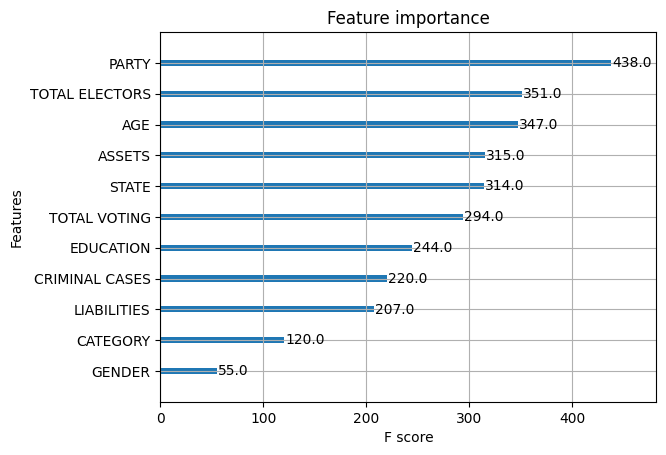

In [321]:
xgb.plot_importance(final_model)

In [322]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2321
           1       0.61      0.54      0.57       187

    accuracy                           0.94      2508
   macro avg       0.79      0.76      0.77      2508
weighted avg       0.94      0.94      0.94      2508



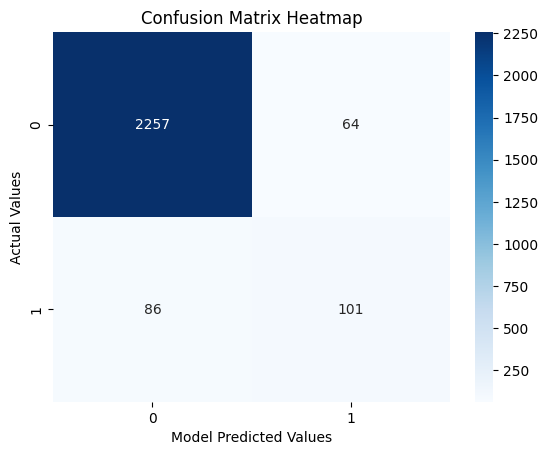

In [323]:
sns.heatmap(confusion_matrix(y_test, pred), cmap= "Blues", annot=True, fmt='')

plt.xlabel("Model Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix Heatmap")
plt.show()